In [ ]:
import os
import pandas as pd
import numpy as np
import gmplot

In [2]:
os.getcwd()

'/Documents/hackathon_3.4.20/code_questionnaire/jupyter_notebooks'

In [3]:
os.chdir('../..')

In [4]:
os.getcwd()

'/Documents/hackathon_3.4.20'

In [5]:
os.listdir()

['heatmap_data',
 '.DS_Store',
 'covid19_temp_latitude_seasonality.pdf',
 'covid19_sources.docx',
 'code_questionnaire',
 'covid19_hightemp_highhumidity.pdf',
 'questionnaire_data',
 'covid19_surface_air_stability.pdf']

In [6]:
os.chdir('heatmap_data')

In [7]:
os.listdir()

['Random Data.xlsx', 'Random_Data.csv']

In [14]:
symptoms_table = pd.read_csv('Random_Data.csv', sep=';')
symptoms_table.head()

,PLZ,Year,Sex,Timestamp,Fever,Cough,Shortness of Breath,Unnamed: 7,Tiredness,Aches,...,Cough.4,Shortness of Breath.4,Unnamed: 55,Tiredness.4,Aches.4,Runny Nose.4,Sore Throught.4,Diarrhea.4,Loss of Taste.4,Temperature.4
0,1000,1980,f,17.03.20,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1000,1927,m,17.03.20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1000,1982,f,17.03.20,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,NaN
3,1000,2004,m,17.03.20,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,NaN
4,1000,1964,m,17.03.20,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN


In [17]:
print(set(symptoms_table.Timestamp))
print(len(set(symptoms_table.PLZ)))
print(symptoms_table.shape)


{'17.03.20'}
3218
(100687, 63)


In [19]:
os.getcwd()

'/Documents/hackathon_3.4.20/heatmap_data'

In [27]:
os.listdir()

['Random Data.xlsx',
 '.DS_Store',
 'Random_Data.csv',
 'postal_code_coordinates.csv']

In [26]:
import csv

In [28]:
postal_code_coordinate_conversion = pd.read_csv('postal_code_coordinates.csv', sep=',')
postal_code_coordinate_conversion.head()

,zip,post_district,comment,country_code,region,town,lat,lng
0,1000,Lausanne,NaN,CH,VD,Lausanne,46.567488,6.680964
1,1001,Lausanne 1 cases,PO box only,CH,VD,Lausanne,46.243526,7.382073
2,1002,Lausanne,PO box only,CH,VD,Lausanne,46.521820,6.632665
3,1003,Lausanne Secteur de dist.,NaN,CH,VD,Lausanne,46.520793,6.631489
4,1004,Lausanne,NaN,CH,VD,Lausanne,46.530039,6.617949


In [29]:
set(postal_code_coordinate_conversion.zip)

{8192,
 8193,
 8194,
 8195,
 8196,
 8197,
 8200,
 8201,
 8203,
 8207,
 8208,
 8212,
 8213,
 8214,
 8215,
 8216,
 8217,
 8218,
 8219,
 8222,
 8223,
 8224,
 8225,
 8226,
 8228,
 8231,
 8232,
 8233,
 8234,
 8235,
 8236,
 8238,
 8239,
 8240,
 8241,
 8242,
 8243,
 8245,
 8246,
 8247,
 8248,
 8252,
 8253,
 8254,
 8255,
 8259,
 8260,
 8261,
 8262,
 8263,
 8264,
 8265,
 8266,
 8267,
 8268,
 8269,
 8272,
 8273,
 8274,
 8280,
 8285,
 8301,
 8302,
 8303,
 8304,
 8305,
 8306,
 8307,
 8308,
 8309,
 8310,
 8311,
 8312,
 8314,
 8315,
 8317,
 8320,
 8322,
 8330,
 8331,
 8332,
 8335,
 8340,
 8342,
 8344,
 8345,
 8352,
 8353,
 8354,
 8355,
 8356,
 8357,
 8360,
 8362,
 8363,
 8370,
 8371,
 8372,
 8374,
 8376,
 8400,
 8401,
 8403,
 8404,
 8405,
 8406,
 8408,
 8409,
 8411,
 8412,
 8413,
 8414,
 8415,
 8416,
 8418,
 8421,
 8422,
 8423,
 8424,
 8425,
 8426,
 8427,
 8428,
 8442,
 8444,
 8447,
 8450,
 8451,
 8452,
 8453,
 8454,
 8455,
 8457,
 8458,
 8459,
 8460,
 8461,
 8462,
 8463,
 8464,
 8465,
 8466,
 8467,

In [43]:
lat_values = []
lng_values = []

for plz in symptoms_table.PLZ:
    check_bools = postal_code_coordinate_conversion.zip==plz
    #print(postal_code_coordinate_conversion[check_bools])
    lat_value = postal_code_coordinate_conversion[check_bools].lat
    lng_value = postal_code_coordinate_conversion[check_bools].lng
    lat_values.append(lat_value)
    lng_values.append(lng_value)

symptoms_table['latitude'] = lat_values
symptoms_table['longitude'] = lng_values

In [44]:
symptoms_table.columns

Index(['PLZ', 'Year', 'Sex', 'Timestamp', 'Fever', 'Cough',
       'Shortness of Breath', 'Unnamed: 7', 'Tiredness', 'Aches', 'Runny Nose',
       'Sore Throught', 'Diarrhea', 'Loss of Taste', 'Temperature',
       'Timestamp.1', 'Fever.1', 'Cough.1', 'Shortness of Breath.1',
       'Unnamed: 19', 'Tiredness.1', 'Aches.1', 'Runny Nose.1',
       'Sore Throught.1', 'Diarrhea.1', 'Loss of Taste.1', 'Temperature.1',
       'Timestamp.2', 'Fever.2', 'Cough.2', 'Shortness of Breath.2',
       'Unnamed: 31', 'Tiredness.2', 'Aches.2', 'Runny Nose.2',
       'Sore Throught.2', 'Diarrhea.2', 'Loss of Taste.2', 'Temperature.2',
       'Timestamp.3', 'Fever.3', 'Cough.3', 'Shortness of Breath.3',
       'Unnamed: 43', 'Tiredness.3', 'Aches.3', 'Runny Nose.3',
       'Sore Throught.3', 'Diarrhea.3', 'Loss of Taste.3', 'Temperature.3',
       'Timestamp.4', 'Fever.4', 'Cough.4', 'Shortness of Breath.4',
       'Unnamed: 55', 'Tiredness.4', 'Aches.4', 'Runny Nose.4',
       'Sore Throught.4', 'Diarr

In [25]:
rows = []
#csv_header = ['user', 'item', 'time', 'rating', 'review']
#frame_header = ['user', 'item', 'rating', 'review']

with open('input.csv', 'rb') as f_input:
    for row in csv.DictReader(f_input, delimiter=' ', fieldnames=csv_header[:-1], restkey=csv_header[-1], skipinitialspace=True):
        try:
            rows.append([row['user'], row['item'], row['rating'], ' '.join(row['review'])])
        except KeyError, e:
            rows.append([row['user'], row['item'], row['rating'], ' '])

frame = pd.DataFrame(rows, columns=frame_header)
print frame

ParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


In [10]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

<Figure size 640x480 with 1 Axes>

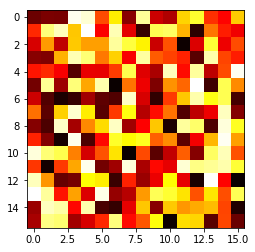

In [11]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()